In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
ola = pd.read_excel('/content/OLA_DataSet.xlsx',sheet_name='July')

In [108]:
ola.head()

,Date,Time,Booking_ID,Booking_Status,Customer_ID,Vehicle_Type,Pickup_Location,Drop_Location,V_TAT,C_TAT,Canceled_Rides_by_Customer,Canceled_Rides_by_Driver,Incomplete_Rides,Incomplete_Rides_Reason,Booking_Value,Payment_Method,Ride_Distance,Driver_Ratings,Customer_Rating,Vehicle Images
0,2024-07-26 14:00:00,14:00:00,CNR7153255142,Canceled by Driver,CID713523,Prime Sedan,Tumkur Road,RT Nagar,NaN,NaN,NaN,Personal & Car related issue,NaN,NaN,444,NaN,0,NaN,NaN,https://cdn-icons-png.flaticon.com/128/14183/1...
1,2024-07-25 22:20:00,22:20:00,CNR2940424040,Success,CID225428,Bike,Magadi Road,Varthur,203.0,30.0,NaN,NaN,No,NaN,158,Cash,13,4.1,4.0,https://cdn-icons-png.flaticon.com/128/9983/99...
2,2024-07-30 19:59:00,19:59:00,CNR2982357879,Success,CID270156,Prime SUV,Sahakar Nagar,Varthur,238.0,130.0,NaN,NaN,No,NaN,386,UPI,40,4.2,4.8,https://cdn-icons-png.flaticon.com/128/9983/99...
3,2024-07-22 03:15:00,03:15:00,CNR2395710036,Canceled by Customer,CID581320,eBike,HSR Layout,Vijayanagar,NaN,NaN,Driver is not moving towards pickup location,NaN,NaN,NaN,384,NaN,0,NaN,NaN,https://cdn-icons-png.flaticon.com/128/6839/68...
4,2024-07-02 09:02:00,09:02:00,CNR1797421769,Success,CID939555,Mini,Rajajinagar,Chamarajpet,252.0,80.0,NaN,NaN,No,NaN,822,Credit Card,45,4.0,3.0,https://cdn-icons-png.flaticon.com/128/3202/32...


In [109]:
ola.columns

Index(['Date', 'Time', 'Booking_ID', 'Booking_Status', 'Customer_ID',
       'Vehicle_Type', 'Pickup_Location', 'Drop_Location', 'V_TAT', 'C_TAT',
       'Canceled_Rides_by_Customer', 'Canceled_Rides_by_Driver',
       'Incomplete_Rides', 'Incomplete_Rides_Reason', 'Booking_Value',
       'Payment_Method', 'Ride_Distance', 'Driver_Ratings', 'Customer_Rating',
       'Vehicle Images'],
      dtype='object')

In [110]:
ola.drop(columns='Vehicle Images',inplace=True)

In [111]:
ola.columns = ola.columns.str.lower()

In [112]:
ola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103024 entries, 0 to 103023
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   date                        103024 non-null  datetime64[ns]
 1   time                        103024 non-null  object        
 2   booking_id                  103024 non-null  object        
 3   booking_status              103024 non-null  object        
 4   customer_id                 103024 non-null  object        
 5   vehicle_type                103024 non-null  object        
 6   pickup_location             103024 non-null  object        
 7   drop_location               103024 non-null  object        
 8   v_tat                       63967 non-null   float64       
 9   c_tat                       63967 non-null   float64       
 10  canceled_rides_by_customer  10499 non-null   object        
 11  canceled_rides_by_driver    18434 non-n

In [113]:
display(ola['booking_status'].unique())
print('--------------------------------------------------')
display(ola['booking_status'].value_counts()*100/ola.shape[0])

array(['Canceled by Driver', 'Success', 'Canceled by Customer',
       'Driver Not Found'], dtype=object)

--------------------------------------------------


,count
booking_status,
Success,62.089416
Canceled by Driver,17.892918
Canceled by Customer,10.190829
Driver Not Found,9.826836


In [114]:
display(ola['vehicle_type'].unique())
print('--------------------------------------------------')
display(ola['vehicle_type'].value_counts()*100/ola.shape[0])

array(['Prime Sedan', 'Bike', 'Prime SUV', 'eBike', 'Mini', 'Prime Plus',
       'Auto'], dtype=object)

--------------------------------------------------


,count
vehicle_type,
Prime Sedan,14.440325
eBike,14.381115
Auto,14.321906
Prime Plus,14.275314
Bike,14.231635
Prime SUV,14.224841
Mini,14.124864


In [115]:
display(ola['pickup_location'].unique())
print('--------------------------------------------------')
display(ola['drop_location'].unique())
print('--------------------------------------------------')
display(ola['pickup_location'].value_counts()*100/ola.shape[0])
print('--------------------------------------------------')
display(ola['drop_location'].value_counts()*100/ola.shape[0])

array(['Tumkur Road', 'Magadi Road', 'Sahakar Nagar', 'HSR Layout',
       'Rajajinagar', 'Kadugodi', 'Bannerghatta Road', 'Chamarajpet',
       'RT Nagar', 'Hosur Road', 'Kammanahalli', 'Cox Town',
       'Indiranagar', 'Ramamurthy Nagar', 'Electronic City',
       'Koramangala', 'Basavanagudi', 'Padmanabhanagar', 'Mysore Road',
       'Yelahanka', 'Frazer Town', 'Jayanagar', 'Majestic',
       'Yeshwanthpur', 'Peenya', 'Marathahalli', 'KR Puram', 'Hulimavu',
       'Shivajinagar', 'Hennur', 'Devanahalli', 'Rajarajeshwari Nagar',
       'Ulsoor', 'Shantinagar', 'JP Nagar', 'Chickpet', 'Langford Town',
       'BTM Layout', 'Sarjapur Road', 'Bellandur', 'Richmond Town',
       'Kengeri', 'Banashankari', 'Vijayanagar', 'Malleshwaram',
       'Whitefield', 'MG Road', 'Hebbal', 'Nagarbhavi', 'Varthur'],
      dtype=object)

--------------------------------------------------


array(['RT Nagar', 'Varthur', 'Vijayanagar', 'Chamarajpet', 'Whitefield',
       'Sarjapur Road', 'Peenya', 'Jayanagar', 'Rajajinagar', 'Yelahanka',
       'Banashankari', 'MG Road', 'HSR Layout', 'BTM Layout',
       'Langford Town', 'Hulimavu', 'Sahakar Nagar', 'Koramangala',
       'Hennur', 'Malleshwaram', 'Indiranagar', 'Richmond Town',
       'Hosur Road', 'JP Nagar', 'Yeshwanthpur', 'Rajarajeshwari Nagar',
       'Majestic', 'Kengeri', 'Mysore Road', 'Shivajinagar',
       'Marathahalli', 'Magadi Road', 'Padmanabhanagar', 'Chickpet',
       'Kadugodi', 'Basavanagudi', 'Nagarbhavi', 'Kammanahalli',
       'Frazer Town', 'Shantinagar', 'Bannerghatta Road', 'Devanahalli',
       'Ramamurthy Nagar', 'Cox Town', 'Electronic City', 'Bellandur',
       'KR Puram', 'Tumkur Road', 'Hebbal', 'Ulsoor'], dtype=object)

--------------------------------------------------


,count
pickup_location,
Banashankari,2.136395
Yeshwanthpur,2.076215
RT Nagar,2.072333
Indiranagar,2.070391
Sahakar Nagar,2.063597
Basavanagudi,2.057773
Ramamurthy Nagar,2.053890
Vijayanagar,2.050978
Tumkur Road,2.043213


--------------------------------------------------


,count
drop_location,
Peenya,2.095628
Mysore Road,2.084951
MG Road,2.065538
Hennur,2.057773
HSR Layout,2.054861
Sarjapur Road,2.046125
Koramangala,2.043213
Marathahalli,2.042243
Vijayanagar,2.041272


In [116]:
display(ola[['pickup_location','drop_location']].drop_duplicates(keep='first'))
print('------+---------+----------+----------+---------')
ola[['pickup_location','drop_location']].value_counts().reset_index().to_csv('busy_routes.csv')

,pickup_location,drop_location
0,Tumkur Road,RT Nagar
1,Magadi Road,Varthur
2,Sahakar Nagar,Varthur
3,HSR Layout,Vijayanagar
4,Rajajinagar,Chamarajpet
...,...,...
20019,Richmond Town,Whitefield
20741,Sahakar Nagar,Banashankari
22208,Sahakar Nagar,Basavanagudi
23216,Banashankari,Ulsoor


------+---------+----------+----------+---------


In [117]:
display(ola['canceled_rides_by_customer'].unique())
print('--------------------------------------------------')
display(ola['canceled_rides_by_customer'].value_counts())

array([nan, 'Driver is not moving towards pickup location',
       'Driver asked to cancel', 'AC is Not working', 'Change of plans',
       'Wrong Address'], dtype=object)

--------------------------------------------------


,count
canceled_rides_by_customer,
Driver is not moving towards pickup location,3175
Driver asked to cancel,2670
Change of plans,2081
AC is Not working,1568
Wrong Address,1005


In [118]:
display(ola['canceled_rides_by_driver'].unique())
print('--------------------------------------------------')
display(ola['canceled_rides_by_driver'].value_counts()*100/ola.shape[0])

array(['Personal & Car related issue', nan, 'Customer was coughing/sick',
       'Customer related issue', 'More than permitted people in there'],
      dtype=object)

--------------------------------------------------


,count
canceled_rides_by_driver,
Personal & Car related issue,6.349977
Customer related issue,5.254116
Customer was coughing/sick,3.546746
More than permitted people in there,2.742080


In [119]:
display(ola['incomplete_rides_reason'].unique())
print('--------------------------------------------------')
display(ola['incomplete_rides_reason'].value_counts()*100/ola.shape[0])

array([nan, 'Customer Demand', 'Vehicle Breakdown', 'Other Issue'],
      dtype=object)

--------------------------------------------------


,count
incomplete_rides_reason,
Customer Demand,1.554007
Vehicle Breakdown,1.544300
Other Issue,0.712455


In [120]:
ola.rename(columns={'date':'booking_timestamp'},inplace=True)

ola['day_name'] = ola['booking_timestamp'].dt.day_name()
ola['date'] = ola['booking_timestamp'].dt.day
ola['hour'] = ola['booking_timestamp'].dt.hour

In [121]:
vehicle_types = pd.read_csv('vehicle_types.csv')

In [122]:
ola = ola.merge(vehicle_types,on='vehicle_type')
ola.drop(columns='vehicle_type',inplace = True)

In [123]:
booking_status = pd.read_csv('booking_status.csv')

In [124]:
ola = ola.merge(booking_status,left_on='booking_status',right_on='status')
ola.drop(columns=['booking_status','status'],inplace = True)

In [125]:
locations = pd.read_csv('locations.csv')

In [126]:
ola = ola.merge(locations,left_on='pickup_location',right_on='location')
ola.drop(columns=['location','pickup_location'],inplace=True)
ola.rename(columns={'location_id':'pickup_location_id'},inplace=True)

ola = ola.merge(locations,left_on='drop_location',right_on='location')
ola.drop(columns=['location','drop_location'],inplace=True)
ola.rename(columns={'location_id':'drop_location_id'},inplace=True)

In [127]:
payment_methods = pd.read_csv('payment_methods.csv')

In [128]:
payment_methods

,payment_method_id,payment_method
0,1,Not Applicable
1,2,Cash
2,3,UPI
3,4,Credit Card
4,5,Debit Card


In [129]:
ola.columns

Index(['booking_timestamp', 'time', 'booking_id', 'customer_id', 'v_tat',
       'c_tat', 'canceled_rides_by_customer', 'canceled_rides_by_driver',
       'incomplete_rides', 'incomplete_rides_reason', 'booking_value',
       'payment_method', 'ride_distance', 'driver_ratings', 'customer_rating',
       'day_name', 'date', 'hour', 'vehicle_type_id', 'status_id',
       'pickup_location_id', 'drop_location_id'],
      dtype='object')

In [130]:
ola.describe()

,booking_timestamp,v_tat,c_tat,booking_value,ride_distance,driver_ratings,customer_rating,date,hour
count,103024,63967.000000,63967.000000,103024.000000,103024.000000,63967.000000,63967.000000,103024.000000,103024.000000
mean,2024-07-16 11:31:38.879678720,170.876952,84.873372,548.751883,14.189927,3.997457,3.998313,15.981267,11.485528
min,2024-07-01 00:00:00,35.000000,25.000000,100.000000,0.000000,3.000000,3.000000,1.000000,0.000000
25%,2024-07-08 18:41:00,98.000000,55.000000,242.000000,0.000000,3.500000,3.500000,8.000000,6.000000
50%,2024-07-16 11:23:00,168.000000,85.000000,386.000000,8.000000,4.000000,4.000000,16.000000,11.000000
75%,2024-07-24 05:18:00,238.000000,115.000000,621.000000,26.000000,4.500000,4.500000,24.000000,17.000000
max,2024-07-31 23:58:00,308.000000,145.000000,2999.000000,49.000000,5.000000,5.000000,31.000000,23.000000
std,NaN,80.803640,36.005100,536.541221,15.776270,0.576834,0.578957,8.931225,6.912131


In [131]:
def get_part_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

ola['part_of_day'] = ola['hour'].apply(get_part_of_day)

In [132]:
ola.isnull().sum()

,0
booking_timestamp,0
time,0
booking_id,0
customer_id,0
v_tat,39057
c_tat,39057
canceled_rides_by_customer,92525
canceled_rides_by_driver,84590
incomplete_rides,39057
incomplete_rides_reason,99098


In [133]:
ola.drop(columns='time',inplace=True)

In [134]:
ola

,booking_timestamp,booking_id,customer_id,v_tat,c_tat,canceled_rides_by_customer,canceled_rides_by_driver,incomplete_rides,incomplete_rides_reason,booking_value,...,driver_ratings,customer_rating,day_name,date,hour,vehicle_type_id,status_id,pickup_location_id,drop_location_id,part_of_day
0,2024-07-26 14:00:00,CNR7153255142,CID713523,NaN,NaN,NaN,Personal & Car related issue,NaN,NaN,444,...,NaN,NaN,Friday,26,14,V-PS,S-CD,L-TR,L-RTN,Afternoon
1,2024-07-25 22:20:00,CNR2940424040,CID225428,203.0,30.0,NaN,NaN,No,NaN,158,...,4.1,4.0,Thursday,25,22,V-BK,S-S,L-MR,L-VT,Night
2,2024-07-30 19:59:00,CNR2982357879,CID270156,238.0,130.0,NaN,NaN,No,NaN,386,...,4.2,4.8,Tuesday,30,19,V-PSUV,S-S,L-SN,L-VT,Evening
3,2024-07-22 03:15:00,CNR2395710036,CID581320,NaN,NaN,Driver is not moving towards pickup location,NaN,NaN,NaN,384,...,NaN,NaN,Monday,22,3,V-EBK,S-CC,L-HL,L-VJ,Night
4,2024-07-02 09:02:00,CNR1797421769,CID939555,252.0,80.0,NaN,NaN,No,NaN,822,...,4.0,3.0,Tuesday,2,9,V-MI,S-S,L-RJ,L-CP,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103019,2024-07-31 09:06:00,CNR9488489435,CID371654,245.0,35.0,NaN,NaN,No,NaN,111,...,3.6,3.8,Wednesday,31,9,V-P+,S-S,L-RT,L-VT,Morning
103020,2024-07-31 15:12:00,CNR3151743100,CID334158,84.0,145.0,NaN,NaN,No,NaN,1097,...,4.3,3.3,Wednesday,31,15,V-AU,S-S,L-VJ,L-RT,Afternoon
103021,2024-07-31 13:59:00,CNR1286151233,CID113188,35.0,75.0,NaN,NaN,No,NaN,2201,...,3.6,3.2,Wednesday,31,13,V-PSUV,S-S,L-BR,L-JPN,Afternoon
103022,2024-07-31 14:56:00,CNR2027162035,CID118301,210.0,140.0,NaN,NaN,No,NaN,267,...,3.4,3.1,Wednesday,31,14,V-EBK,S-S,L-IDN,L-MR,Afternoon


In [135]:
ola[['canceled_rides_by_customer','canceled_rides_by_driver']]

,canceled_rides_by_customer,canceled_rides_by_driver
0,NaN,Personal & Car related issue
1,NaN,NaN
2,NaN,NaN
3,Driver is not moving towards pickup location,NaN
4,NaN,NaN
...,...,...
103019,NaN,NaN
103020,NaN,NaN
103021,NaN,NaN
103022,NaN,NaN


In [136]:
ola.loc[(ola['canceled_rides_by_customer'].isnull()) & (ola['canceled_rides_by_driver'].isnull()) & (ola['incomplete_rides'] == 'Yes'),'status_id'].unique()

array(['S-S'], dtype=object)

## Understand the data

### Subtask:
Check the data types, look for missing values, and get a statistical summary of the numerical columns.


**Reasoning**:
Display the data types, missing values, and statistical summary of the dataframe as requested by the instructions.



In [137]:
ola.info()
print('--------------------------------------------------')
display(ola.isnull().sum())
print('--------------------------------------------------')
display(ola.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103024 entries, 0 to 103023
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   booking_timestamp           103024 non-null  datetime64[ns]
 1   booking_id                  103024 non-null  object        
 2   customer_id                 103024 non-null  object        
 3   v_tat                       63967 non-null   float64       
 4   c_tat                       63967 non-null   float64       
 5   canceled_rides_by_customer  10499 non-null   object        
 6   canceled_rides_by_driver    18434 non-null   object        
 7   incomplete_rides            63967 non-null   object        
 8   incomplete_rides_reason     3926 non-null    object        
 9   booking_value               103024 non-null  int64         
 10  payment_method              63967 non-null   object        
 11  ride_distance               103024 non-

,0
booking_timestamp,0
booking_id,0
customer_id,0
v_tat,39057
c_tat,39057
canceled_rides_by_customer,92525
canceled_rides_by_driver,84590
incomplete_rides,39057
incomplete_rides_reason,99098
booking_value,0


--------------------------------------------------


,booking_timestamp,v_tat,c_tat,booking_value,ride_distance,driver_ratings,customer_rating,date,hour
count,103024,63967.000000,63967.000000,103024.000000,103024.000000,63967.000000,63967.000000,103024.000000,103024.000000
mean,2024-07-16 11:31:38.879678720,170.876952,84.873372,548.751883,14.189927,3.997457,3.998313,15.981267,11.485528
min,2024-07-01 00:00:00,35.000000,25.000000,100.000000,0.000000,3.000000,3.000000,1.000000,0.000000
25%,2024-07-08 18:41:00,98.000000,55.000000,242.000000,0.000000,3.500000,3.500000,8.000000,6.000000
50%,2024-07-16 11:23:00,168.000000,85.000000,386.000000,8.000000,4.000000,4.000000,16.000000,11.000000
75%,2024-07-24 05:18:00,238.000000,115.000000,621.000000,26.000000,4.500000,4.500000,24.000000,17.000000
max,2024-07-31 23:58:00,308.000000,145.000000,2999.000000,49.000000,5.000000,5.000000,31.000000,23.000000
std,NaN,80.803640,36.005100,536.541221,15.776270,0.576834,0.578957,8.931225,6.912131


## Analyze categorical features

### Subtask:
Explore the unique values and their distributions for categorical columns.


**Reasoning**:
Iterate through the categorical columns and display unique values and their percentage distribution.



In [138]:
categorical_cols = ola.select_dtypes(include='object').columns

for col in categorical_cols:
    print(f"Column: {col}")
    display(ola[col].unique())
    print('--------------------------------------------------')
    display(ola[col].value_counts(normalize=True) * 100)
    print('==================================================')

Column: booking_id


array(['CNR7153255142', 'CNR2940424040', 'CNR2982357879', ...,
       'CNR1286151233', 'CNR2027162035', 'CNR9770709721'], dtype=object)

--------------------------------------------------


,proportion
booking_id,
CNR3204013257,0.000971
CNR5979995999,0.000971
CNR3766293727,0.000971
CNR1573041532,0.000971
CNR2619112624,0.000971
...,...
CNR1797421769,0.000971
CNR2395710036,0.000971
CNR2982357879,0.000971


Column: customer_id


array(['CID713523', 'CID225428', 'CID270156', ..., 'CID290589',
       'CID702125', 'CID684944'], dtype=object)

--------------------------------------------------


,proportion
customer_id,
CID954071,0.004853
CID782883,0.003883
CID952434,0.003883
CID539191,0.003883
CID819034,0.003883
...,...
CID447657,0.000971
CID259449,0.000971
CID296711,0.000971


Column: canceled_rides_by_customer


array([nan, 'Driver is not moving towards pickup location',
       'Driver asked to cancel', 'AC is Not working', 'Change of plans',
       'Wrong Address'], dtype=object)

--------------------------------------------------


,proportion
canceled_rides_by_customer,
Driver is not moving towards pickup location,30.240975
Driver asked to cancel,25.430993
Change of plans,19.820935
AC is Not working,14.934756
Wrong Address,9.572340


Column: canceled_rides_by_driver


array(['Personal & Car related issue', nan, 'Customer was coughing/sick',
       'Customer related issue', 'More than permitted people in there'],
      dtype=object)

--------------------------------------------------


,proportion
canceled_rides_by_driver,
Personal & Car related issue,35.488771
Customer related issue,29.364218
Customer was coughing/sick,19.822068
More than permitted people in there,15.324943


Column: incomplete_rides


array([nan, 'No', 'Yes'], dtype=object)

--------------------------------------------------


,proportion
incomplete_rides,
No,93.86246
Yes,6.13754


Column: incomplete_rides_reason


array([nan, 'Customer Demand', 'Vehicle Breakdown', 'Other Issue'],
      dtype=object)

--------------------------------------------------


,proportion
incomplete_rides_reason,
Customer Demand,40.779419
Vehicle Breakdown,40.524707
Other Issue,18.695874


Column: payment_method


array([nan, 'Cash', 'UPI', 'Credit Card', 'Debit Card'], dtype=object)

--------------------------------------------------


,proportion
payment_method,
Cash,54.750106
UPI,40.459925
Credit Card,3.806650
Debit Card,0.983320


Column: day_name


array(['Friday', 'Thursday', 'Tuesday', 'Monday', 'Saturday', 'Wednesday',
       'Sunday'], dtype=object)

--------------------------------------------------


,proportion
day_name,
Tuesday,16.429182
Monday,16.237964
Wednesday,15.951623
Friday,12.953292
Saturday,12.949410
Thursday,12.847492
Sunday,12.631037


Column: vehicle_type_id


array(['V-PS', 'V-BK', 'V-PSUV', 'V-EBK', 'V-MI', 'V-P+', 'V-AU'],
      dtype=object)

--------------------------------------------------


,proportion
vehicle_type_id,
V-PS,14.440325
V-EBK,14.381115
V-AU,14.321906
V-P+,14.275314
V-BK,14.231635
V-PSUV,14.224841
V-MI,14.124864


Column: status_id


array(['S-CD', 'S-S', 'S-CC', 'S-DNF'], dtype=object)

--------------------------------------------------


,proportion
status_id,
S-S,62.089416
S-CD,17.892918
S-CC,10.190829
S-DNF,9.826836


Column: pickup_location_id


array(['L-TR', 'L-MR', 'L-SN', 'L-HL', 'L-RJ', 'L-KD', 'L-BR', 'L-CP',
       'L-RTN', 'L-HR', 'L-KM', 'L-CT', 'L-IDN', 'L-RMN', 'L-EC', 'L-KGM',
       'L-BG', 'L-PN', 'L-MRD', 'L-YL', 'L-FT', 'L-JY', 'L-MJ', 'L-YSP',
       'L-PY', 'L-MH', 'L-KRP', 'L-HM', 'L-SJ', 'L-HN', 'L-DH', 'L-RRN',
       'L-UL', 'L-ST', 'L-JPN', 'L-CKP', 'L-LT', 'L-BTM', 'L-SJR', 'L-BL',
       'L-RT', 'L-KG', 'L-BNS', 'L-VJ', 'L-ML', 'L-WF', 'L-MGR', 'L-HB',
       'L-NB', 'L-VT'], dtype=object)

--------------------------------------------------


,proportion
pickup_location_id,
L-BNS,2.136395
L-YSP,2.076215
L-RTN,2.072333
L-IDN,2.070391
L-SN,2.063597
L-BG,2.057773
L-RMN,2.053890
L-VJ,2.050978
L-TR,2.043213


Column: drop_location_id


array(['L-RTN', 'L-VT', 'L-VJ', 'L-CP', 'L-WF', 'L-SJR', 'L-PY', 'L-JY',
       'L-RJ', 'L-YL', 'L-BNS', 'L-MGR', 'L-HL', 'L-BTM', 'L-LT', 'L-HM',
       'L-SN', 'L-KGM', 'L-HN', 'L-ML', 'L-IDN', 'L-RT', 'L-HR', 'L-JPN',
       'L-YSP', 'L-RRN', 'L-MJ', 'L-KG', 'L-MRD', 'L-SJ', 'L-MH', 'L-MR',
       'L-PN', 'L-CKP', 'L-KD', 'L-BG', 'L-NB', 'L-KM', 'L-FT', 'L-ST',
       'L-BR', 'L-DH', 'L-RMN', 'L-CT', 'L-EC', 'L-BL', 'L-KRP', 'L-TR',
       'L-HB', 'L-UL'], dtype=object)

--------------------------------------------------


,proportion
drop_location_id,
L-PY,2.095628
L-MRD,2.084951
L-MGR,2.065538
L-HN,2.057773
L-HL,2.054861
L-SJR,2.046125
L-KGM,2.043213
L-MH,2.042243
L-VJ,2.041272


Column: part_of_day


array(['Afternoon', 'Night', 'Evening', 'Morning'], dtype=object)

--------------------------------------------------


,proportion
part_of_day,
Night,33.262153
Morning,29.280556
Afternoon,20.929104
Evening,16.528188


In [139]:
pickup_counts = ola['pickup_location_id'].value_counts().reset_index(name='number_of_bookings')
print("Top 10 Busiest Pickup Locations:")
display(pickup_counts.head(10))

drop_counts = ola['drop_location_id'].value_counts().reset_index(name='number_of_bookings')
print("\nTop 10 Busiest Drop Locations:")
display(drop_counts.head(10))

Top 10 Busiest Pickup Locations:


,pickup_location_id,number_of_bookings
0,L-BNS,2201
1,L-YSP,2139
2,L-RTN,2135
3,L-IDN,2133
4,L-SN,2126
5,L-BG,2120
6,L-RMN,2116
7,L-VJ,2113
8,L-TR,2105
9,L-CT,2100



Top 10 Busiest Drop Locations:


,drop_location_id,number_of_bookings
0,L-PY,2159
1,L-MRD,2148
2,L-MGR,2128
3,L-HN,2120
4,L-HL,2117
5,L-SJR,2108
6,L-KGM,2105
7,L-MH,2104
8,L-VJ,2103
9,L-HB,2097


In [140]:
ola

,booking_timestamp,booking_id,customer_id,v_tat,c_tat,canceled_rides_by_customer,canceled_rides_by_driver,incomplete_rides,incomplete_rides_reason,booking_value,...,driver_ratings,customer_rating,day_name,date,hour,vehicle_type_id,status_id,pickup_location_id,drop_location_id,part_of_day
0,2024-07-26 14:00:00,CNR7153255142,CID713523,NaN,NaN,NaN,Personal & Car related issue,NaN,NaN,444,...,NaN,NaN,Friday,26,14,V-PS,S-CD,L-TR,L-RTN,Afternoon
1,2024-07-25 22:20:00,CNR2940424040,CID225428,203.0,30.0,NaN,NaN,No,NaN,158,...,4.1,4.0,Thursday,25,22,V-BK,S-S,L-MR,L-VT,Night
2,2024-07-30 19:59:00,CNR2982357879,CID270156,238.0,130.0,NaN,NaN,No,NaN,386,...,4.2,4.8,Tuesday,30,19,V-PSUV,S-S,L-SN,L-VT,Evening
3,2024-07-22 03:15:00,CNR2395710036,CID581320,NaN,NaN,Driver is not moving towards pickup location,NaN,NaN,NaN,384,...,NaN,NaN,Monday,22,3,V-EBK,S-CC,L-HL,L-VJ,Night
4,2024-07-02 09:02:00,CNR1797421769,CID939555,252.0,80.0,NaN,NaN,No,NaN,822,...,4.0,3.0,Tuesday,2,9,V-MI,S-S,L-RJ,L-CP,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103019,2024-07-31 09:06:00,CNR9488489435,CID371654,245.0,35.0,NaN,NaN,No,NaN,111,...,3.6,3.8,Wednesday,31,9,V-P+,S-S,L-RT,L-VT,Morning
103020,2024-07-31 15:12:00,CNR3151743100,CID334158,84.0,145.0,NaN,NaN,No,NaN,1097,...,4.3,3.3,Wednesday,31,15,V-AU,S-S,L-VJ,L-RT,Afternoon
103021,2024-07-31 13:59:00,CNR1286151233,CID113188,35.0,75.0,NaN,NaN,No,NaN,2201,...,3.6,3.2,Wednesday,31,13,V-PSUV,S-S,L-BR,L-JPN,Afternoon
103022,2024-07-31 14:56:00,CNR2027162035,CID118301,210.0,140.0,NaN,NaN,No,NaN,267,...,3.4,3.1,Wednesday,31,14,V-EBK,S-S,L-IDN,L-MR,Afternoon


In [141]:
ola.columns

Index(['booking_timestamp', 'booking_id', 'customer_id', 'v_tat', 'c_tat',
       'canceled_rides_by_customer', 'canceled_rides_by_driver',
       'incomplete_rides', 'incomplete_rides_reason', 'booking_value',
       'payment_method', 'ride_distance', 'driver_ratings', 'customer_rating',
       'day_name', 'date', 'hour', 'vehicle_type_id', 'status_id',
       'pickup_location_id', 'drop_location_id', 'part_of_day'],
      dtype='object')

In [142]:
# Check the status_id for rows where v_tat is missing
print("Status ID for rows with missing v_tat:")
display(ola.loc[ola['v_tat'].isnull(), 'status_id'].unique())

# Check the status_id for rows where c_tat is missing
print("\nStatus ID for rows with missing c_tat:")
display(ola.loc[ola['c_tat'].isnull(), 'status_id'].unique())

# Check the status_id for rows where driver_ratings is missing
print("\nStatus ID for rows with missing driver_ratings:")
display(ola.loc[ola['driver_ratings'].isnull(), 'status_id'].unique())

# Check the status_id for rows where customer_rating is missing
print("\nStatus ID for rows with missing customer_rating:")
display(ola.loc[ola['customer_rating'].isnull(), 'status_id'].unique())

# Check the incomplete_rides status for rows where v_tat is missing
print("\nIncomplete rides status for rows with missing v_tat:")
display(ola.loc[ola['v_tat'].isnull(), 'incomplete_rides'].unique())

# Check the incomplete_rides status for rows where c_tat is missing
print("\nIncomplete rides status for rows with missing c_tat:")
display(ola.loc[ola['c_tat'].isnull(), 'incomplete_rides'].unique())

# Check the incomplete_rides status for rows where driver_ratings is missing
print("\nIncomplete rides status for rows with missing driver_ratings:")
display(ola.loc[ola['driver_ratings'].isnull(), 'incomplete_rides'].unique())

# Check the incomplete_rides status for rows where customer_rating is missing
print("\nIncomplete rides status for rows with missing customer_rating:")
display(ola.loc[ola['customer_rating'].isnull(), 'incomplete_rides'].unique())

Status ID for rows with missing v_tat:


array(['S-CD', 'S-CC', 'S-DNF'], dtype=object)


Status ID for rows with missing c_tat:


array(['S-CD', 'S-CC', 'S-DNF'], dtype=object)


Status ID for rows with missing driver_ratings:


array(['S-CD', 'S-CC', 'S-DNF'], dtype=object)


Status ID for rows with missing customer_rating:


array(['S-CD', 'S-CC', 'S-DNF'], dtype=object)


Incomplete rides status for rows with missing v_tat:


array([nan], dtype=object)


Incomplete rides status for rows with missing c_tat:


array([nan], dtype=object)


Incomplete rides status for rows with missing driver_ratings:


array([nan], dtype=object)


Incomplete rides status for rows with missing customer_rating:


array([nan], dtype=object)

In [143]:
numerical_cols_to_fill = ['v_tat', 'c_tat', 'driver_ratings', 'customer_rating']
ola[numerical_cols_to_fill] = ola[numerical_cols_to_fill].fillna(0)

# Verify the changes
display(ola[numerical_cols_to_fill].isnull().sum())

,0
v_tat,0
c_tat,0
driver_ratings,0
customer_rating,0


In [144]:
ola.loc[ola['payment_method'].isnull(),['v_tat','c_tat','canceled_rides_by_customer','canceled_rides_by_driver','incomplete_rides','ride_distance','driver_ratings','customer_rating']]

,v_tat,c_tat,canceled_rides_by_customer,canceled_rides_by_driver,incomplete_rides,ride_distance,driver_ratings,customer_rating
0,0.0,0.0,NaN,Personal & Car related issue,NaN,0,0.0,0.0
3,0.0,0.0,Driver is not moving towards pickup location,NaN,NaN,0,0.0,0.0
7,0.0,0.0,NaN,Personal & Car related issue,NaN,0,0.0,0.0
8,0.0,0.0,NaN,NaN,NaN,0,0.0,0.0
9,0.0,0.0,NaN,Personal & Car related issue,NaN,0,0.0,0.0
...,...,...,...,...,...,...,...,...
103008,0.0,0.0,NaN,NaN,NaN,0,0.0,0.0
103010,0.0,0.0,NaN,Customer was coughing/sick,NaN,0,0.0,0.0
103014,0.0,0.0,NaN,NaN,NaN,0,0.0,0.0
103015,0.0,0.0,NaN,Customer related issue,NaN,0,0.0,0.0


In [145]:
ola.loc[~(ola['canceled_rides_by_customer'].isnull()) | ~(ola['canceled_rides_by_driver'].isnull()),['status_id','canceled_rides_by_customer','canceled_rides_by_driver']]

,status_id,canceled_rides_by_customer,canceled_rides_by_driver
0,S-CD,NaN,Personal & Car related issue
3,S-CC,Driver is not moving towards pickup location,NaN
7,S-CD,NaN,Personal & Car related issue
9,S-CD,NaN,Personal & Car related issue
13,S-CD,NaN,Personal & Car related issue
...,...,...,...
102994,S-CC,Driver asked to cancel,NaN
102999,S-CC,Driver is not moving towards pickup location,NaN
103001,S-CD,NaN,Personal & Car related issue
103010,S-CD,NaN,Customer was coughing/sick


In [146]:
ola.loc[ola['status_id']=='S-CD','canceled_rides_by_customer'] = 'Not-Applicable'
ola.loc[ola['status_id']=='S-CC','canceled_rides_by_driver'] = 'Not-Applicable'

In [147]:
ola[['canceled_rides_by_customer','canceled_rides_by_customer','payment_method']].isnull().sum()

,0
canceled_rides_by_customer,74091
canceled_rides_by_customer,74091
payment_method,39057


In [148]:
display(ola.loc[ola['payment_method'].isnull(),['v_tat','c_tat','canceled_rides_by_customer','canceled_rides_by_driver','incomplete_rides','ride_distance','driver_ratings','customer_rating']])

,v_tat,c_tat,canceled_rides_by_customer,canceled_rides_by_driver,incomplete_rides,ride_distance,driver_ratings,customer_rating
0,0.0,0.0,Not-Applicable,Personal & Car related issue,NaN,0,0.0,0.0
3,0.0,0.0,Driver is not moving towards pickup location,Not-Applicable,NaN,0,0.0,0.0
7,0.0,0.0,Not-Applicable,Personal & Car related issue,NaN,0,0.0,0.0
8,0.0,0.0,NaN,NaN,NaN,0,0.0,0.0
9,0.0,0.0,Not-Applicable,Personal & Car related issue,NaN,0,0.0,0.0
...,...,...,...,...,...,...,...,...
103008,0.0,0.0,NaN,NaN,NaN,0,0.0,0.0
103010,0.0,0.0,Not-Applicable,Customer was coughing/sick,NaN,0,0.0,0.0
103014,0.0,0.0,NaN,NaN,NaN,0,0.0,0.0
103015,0.0,0.0,Not-Applicable,Customer related issue,NaN,0,0.0,0.0


In [149]:
# Fill missing values in 'incomplete_rides' with 'Not Applicable'
ola['incomplete_rides'] = ola['incomplete_rides'].fillna('Not Applicable')

# Fill missing values in 'incomplete_rides_reason' with 'No Incomplete Reason'
# This covers cases where the ride was not incomplete or the reason was not recorded
ola['incomplete_rides_reason'] = ola['incomplete_rides_reason'].fillna('No Incomplete Reason')

# Verify the changes
display(ola[['incomplete_rides', 'incomplete_rides_reason']].isnull().sum())

,0
incomplete_rides,0
incomplete_rides_reason,0


In [150]:
# Check the status_id for rows where incomplete_rides is missing
print("Status ID for rows with missing incomplete_rides:")
display(ola.loc[ola['incomplete_rides'].isnull(), 'status_id'].unique())

Status ID for rows with missing incomplete_rides:


array([], dtype=object)

In [151]:
ola['payment_method'] = ola['payment_method'].fillna('Not Applicable')

# Verify that there are no more missing values in 'payment_method'
display(ola['payment_method'].isnull().sum())

np.int64(0)

In [152]:
payment_methods

,payment_method_id,payment_method
0,1,Not Applicable
1,2,Cash
2,3,UPI
3,4,Credit Card
4,5,Debit Card


In [153]:
ola['payment_method'].unique()

array(['Not Applicable', 'Cash', 'UPI', 'Credit Card', 'Debit Card'],
      dtype=object)

In [154]:
ola = ola.merge(payment_methods,on='payment_method').drop(columns='payment_method')

In [155]:
ola.isnull().sum()

,0
booking_timestamp,0
booking_id,0
customer_id,0
v_tat,0
c_tat,0
canceled_rides_by_customer,74091
canceled_rides_by_driver,74091
incomplete_rides,0
incomplete_rides_reason,0
booking_value,0


In [156]:
ola.loc[ola['canceled_rides_by_customer'].isnull()]

,booking_timestamp,booking_id,customer_id,v_tat,c_tat,canceled_rides_by_customer,canceled_rides_by_driver,incomplete_rides,incomplete_rides_reason,booking_value,...,customer_rating,day_name,date,hour,vehicle_type_id,status_id,pickup_location_id,drop_location_id,part_of_day,payment_method_id
1,2024-07-25 22:20:00,CNR2940424040,CID225428,203.0,30.0,NaN,NaN,No,No Incomplete Reason,158,...,4.0,Thursday,25,22,V-BK,S-S,L-MR,L-VT,Night,2
2,2024-07-30 19:59:00,CNR2982357879,CID270156,238.0,130.0,NaN,NaN,No,No Incomplete Reason,386,...,4.8,Tuesday,30,19,V-PSUV,S-S,L-SN,L-VT,Evening,3
4,2024-07-02 09:02:00,CNR1797421769,CID939555,252.0,80.0,NaN,NaN,No,No Incomplete Reason,822,...,3.0,Tuesday,2,9,V-MI,S-S,L-RJ,L-CP,Morning,4
5,2024-07-13 04:42:00,CNR8787177882,CID802429,231.0,90.0,NaN,NaN,No,No Incomplete Reason,173,...,4.6,Saturday,13,4,V-MI,S-S,L-KD,L-VJ,Night,3
6,2024-07-23 09:51:00,CNR3612067560,CID476071,133.0,40.0,NaN,NaN,No,No Incomplete Reason,140,...,4.5,Tuesday,23,9,V-BK,S-S,L-TR,L-WF,Morning,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103019,2024-07-31 09:06:00,CNR9488489435,CID371654,245.0,35.0,NaN,NaN,No,No Incomplete Reason,111,...,3.8,Wednesday,31,9,V-P+,S-S,L-RT,L-VT,Morning,2
103020,2024-07-31 15:12:00,CNR3151743100,CID334158,84.0,145.0,NaN,NaN,No,No Incomplete Reason,1097,...,3.3,Wednesday,31,15,V-AU,S-S,L-VJ,L-RT,Afternoon,3
103021,2024-07-31 13:59:00,CNR1286151233,CID113188,35.0,75.0,NaN,NaN,No,No Incomplete Reason,2201,...,3.2,Wednesday,31,13,V-PSUV,S-S,L-BR,L-JPN,Afternoon,2
103022,2024-07-31 14:56:00,CNR2027162035,CID118301,210.0,140.0,NaN,NaN,No,No Incomplete Reason,267,...,3.1,Wednesday,31,14,V-EBK,S-S,L-IDN,L-MR,Afternoon,3


In [157]:
# Filter for rows where both cancellation columns are null/Not Applicable and status_id is 'S-S'
successful_rides_no_cancellation_reason = ola.loc[
    (ola['canceled_rides_by_customer'].isnull()) &
    (ola['canceled_rides_by_driver'].isnull()) &
    (ola['status_id'] == 'S-S')
]

# Display the first few rows and the count of such cases
print("Rows where canceled_rides_by_customer and canceled_rides_by_driver are null and status_id is 'S-S':")
display(successful_rides_no_cancellation_reason.head())
print(f"\nNumber of such cases: {len(successful_rides_no_cancellation_reason)}")

Rows where canceled_rides_by_customer and canceled_rides_by_driver are null and status_id is 'S-S':


,booking_timestamp,booking_id,customer_id,v_tat,c_tat,canceled_rides_by_customer,canceled_rides_by_driver,incomplete_rides,incomplete_rides_reason,booking_value,...,customer_rating,day_name,date,hour,vehicle_type_id,status_id,pickup_location_id,drop_location_id,part_of_day,payment_method_id
1,2024-07-25 22:20:00,CNR2940424040,CID225428,203.0,30.0,NaN,NaN,No,No Incomplete Reason,158,...,4.0,Thursday,25,22,V-BK,S-S,L-MR,L-VT,Night,2
2,2024-07-30 19:59:00,CNR2982357879,CID270156,238.0,130.0,NaN,NaN,No,No Incomplete Reason,386,...,4.8,Tuesday,30,19,V-PSUV,S-S,L-SN,L-VT,Evening,3
4,2024-07-02 09:02:00,CNR1797421769,CID939555,252.0,80.0,NaN,NaN,No,No Incomplete Reason,822,...,3.0,Tuesday,2,9,V-MI,S-S,L-RJ,L-CP,Morning,4
5,2024-07-13 04:42:00,CNR8787177882,CID802429,231.0,90.0,NaN,NaN,No,No Incomplete Reason,173,...,4.6,Saturday,13,4,V-MI,S-S,L-KD,L-VJ,Night,3
6,2024-07-23 09:51:00,CNR3612067560,CID476071,133.0,40.0,NaN,NaN,No,No Incomplete Reason,140,...,4.5,Tuesday,23,9,V-BK,S-S,L-TR,L-WF,Morning,2



Number of such cases: 63967


In [158]:
# Fill nulls in 'canceled_rides_by_customer' with 'Not Applicable' for successful rides with no cancellation reason
ola.loc[
    (ola['canceled_rides_by_customer'].isnull()) &
    (ola['canceled_rides_by_driver'].isnull()) &
    (ola['status_id'] == 'S-S'),
    'canceled_rides_by_customer'
] = 'Not Applicable'

# Fill nulls in 'canceled_rides_by_driver' with 'Not Applicable' for successful rides with no cancellation reason
ola.loc[
    (ola['canceled_rides_by_customer'].isnull()) &
    (ola['canceled_rides_by_driver'].isnull()) &
    (ola['status_id'] == 'S-S'),
    'canceled_rides_by_driver'
] = 'Not Applicable'

# Verify that there are no more such cases with null values in these columns
print("Number of rows where canceled_rides_by_customer and canceled_rides_by_driver are null and status_id is 'S-S' after imputation:")
display(len(ola.loc[
    (ola['canceled_rides_by_customer'].isnull()) &
    (ola['canceled_rides_by_driver'].isnull()) &
    (ola['status_id'] == 'S-S')
]))

Number of rows where canceled_rides_by_customer and canceled_rides_by_driver are null and status_id is 'S-S' after imputation:


0

In [159]:
ola.isnull().sum()

,0
booking_timestamp,0
booking_id,0
customer_id,0
v_tat,0
c_tat,0
canceled_rides_by_customer,10124
canceled_rides_by_driver,74091
incomplete_rides,0
incomplete_rides_reason,0
booking_value,0


In [160]:
ola.loc[ola['canceled_rides_by_driver'].isna() & ola['canceled_rides_by_customer'].isna()]

,booking_timestamp,booking_id,customer_id,v_tat,c_tat,canceled_rides_by_customer,canceled_rides_by_driver,incomplete_rides,incomplete_rides_reason,booking_value,...,customer_rating,day_name,date,hour,vehicle_type_id,status_id,pickup_location_id,drop_location_id,part_of_day,payment_method_id
8,2024-07-01 19:19:00,CNR5030602354,CID999840,0.0,0.0,NaN,NaN,Not Applicable,No Incomplete Reason,839,...,0.0,Monday,1,19,V-MI,S-DNF,L-CP,L-PY,Evening,1
16,2024-07-02 23:50:00,CNR3211335290,CID630354,0.0,0.0,NaN,NaN,Not Applicable,No Incomplete Reason,366,...,0.0,Tuesday,2,23,V-MI,S-DNF,L-RMN,L-BTM,Night,1
30,2024-07-23 07:04:00,CNR2998177390,CID946041,0.0,0.0,NaN,NaN,Not Applicable,No Incomplete Reason,802,...,0.0,Tuesday,23,7,V-AU,S-DNF,L-RTN,L-YL,Morning,1
46,2024-07-16 16:25:00,CNR5503358927,CID552049,0.0,0.0,NaN,NaN,Not Applicable,No Incomplete Reason,594,...,0.0,Tuesday,16,16,V-BK,S-DNF,L-PY,L-MGR,Afternoon,1
53,2024-07-01 02:21:00,CNR1557960488,CID884386,0.0,0.0,NaN,NaN,Not Applicable,No Incomplete Reason,162,...,0.0,Monday,1,2,V-PSUV,S-DNF,L-RRN,L-VT,Night,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103004,2024-07-31 06:53:00,CNR1573041532,CID708605,0.0,0.0,NaN,NaN,Not Applicable,No Incomplete Reason,118,...,0.0,Wednesday,31,6,V-MI,S-DNF,L-KGM,L-KGM,Morning,1
103005,2024-07-31 13:24:00,CNR3766293727,CID403788,0.0,0.0,NaN,NaN,Not Applicable,No Incomplete Reason,103,...,0.0,Wednesday,31,13,V-BK,S-DNF,L-KD,L-HR,Afternoon,1
103008,2024-07-31 14:38:00,CNR9936519920,CID428976,0.0,0.0,NaN,NaN,Not Applicable,No Incomplete Reason,549,...,0.0,Wednesday,31,14,V-P+,S-DNF,L-YSP,L-MH,Afternoon,1
103014,2024-07-31 17:11:00,CNR8606968614,CID259664,0.0,0.0,NaN,NaN,Not Applicable,No Incomplete Reason,545,...,0.0,Wednesday,31,17,V-BK,S-DNF,L-BNS,L-YL,Evening,1


In [161]:
# Filter for rows where both cancellation columns are null/Not Applicable and status_id is 'S-DNF'
driver_not_found_no_cancellation = ola.loc[
    (ola['canceled_rides_by_customer'].isna()) &
    (ola['canceled_rides_by_driver'].isna()) &
    (ola['status_id'] == 'S-DNF')
]

# Display the first few rows and the count of such cases
print("Rows where canceled_rides_by_customer and canceled_rides_by_driver are NaN and status_id is 'S-DNF':")
display(driver_not_found_no_cancellation.head())
print(f"\nNumber of such cases: {len(driver_not_found_no_cancellation)}")

Rows where canceled_rides_by_customer and canceled_rides_by_driver are NaN and status_id is 'S-DNF':


,booking_timestamp,booking_id,customer_id,v_tat,c_tat,canceled_rides_by_customer,canceled_rides_by_driver,incomplete_rides,incomplete_rides_reason,booking_value,...,customer_rating,day_name,date,hour,vehicle_type_id,status_id,pickup_location_id,drop_location_id,part_of_day,payment_method_id
8,2024-07-01 19:19:00,CNR5030602354,CID999840,0.0,0.0,NaN,NaN,Not Applicable,No Incomplete Reason,839,...,0.0,Monday,1,19,V-MI,S-DNF,L-CP,L-PY,Evening,1
16,2024-07-02 23:50:00,CNR3211335290,CID630354,0.0,0.0,NaN,NaN,Not Applicable,No Incomplete Reason,366,...,0.0,Tuesday,2,23,V-MI,S-DNF,L-RMN,L-BTM,Night,1
30,2024-07-23 07:04:00,CNR2998177390,CID946041,0.0,0.0,NaN,NaN,Not Applicable,No Incomplete Reason,802,...,0.0,Tuesday,23,7,V-AU,S-DNF,L-RTN,L-YL,Morning,1
46,2024-07-16 16:25:00,CNR5503358927,CID552049,0.0,0.0,NaN,NaN,Not Applicable,No Incomplete Reason,594,...,0.0,Tuesday,16,16,V-BK,S-DNF,L-PY,L-MGR,Afternoon,1
53,2024-07-01 02:21:00,CNR1557960488,CID884386,0.0,0.0,NaN,NaN,Not Applicable,No Incomplete Reason,162,...,0.0,Monday,1,2,V-PSUV,S-DNF,L-RRN,L-VT,Night,1



Number of such cases: 10124


In [162]:
# Fill nulls in 'canceled_rides_by_customer' with 'Not Applicable' where status_id is 'S-DNF'
ola.loc[ola['status_id'] == 'S-DNF', 'canceled_rides_by_customer'] = ola.loc[ola['status_id'] == 'S-DNF', 'canceled_rides_by_customer'].fillna('Not Applicable')

# Fill nulls in 'canceled_rides_by_driver' with 'Not Applicable' where status_id is 'S-DNF'
ola.loc[ola['status_id'] == 'S-DNF', 'canceled_rides_by_driver'] = ola.loc[ola['status_id'] == 'S-DNF', 'canceled_rides_by_driver'].fillna('Not Applicable')

# Verify that there are no more missing values in these columns
print("Missing values after filling nulls for S-DNF status:")
display(ola[['canceled_rides_by_customer', 'canceled_rides_by_driver']].isnull().sum())

Missing values after filling nulls for S-DNF status:


,0
canceled_rides_by_customer,0
canceled_rides_by_driver,63967


In [163]:
# Check if there are any remaining nulls in canceled_rides_by_customer not associated with S-DNF
print("Nulls in 'canceled_rides_by_customer' not associated with 'S-DNF':")
display(ola.loc[ola['canceled_rides_by_customer'].isnull() & (ola['status_id'] != 'S-DNF')])

# Check if there are any remaining nulls in canceled_rides_by_driver not associated with S-DNF
print("\nNulls in 'canceled_rides_by_driver' not associated with 'S-DNF':")
display(ola.loc[ola['canceled_rides_by_driver'].isnull() & (ola['status_id'] != 'S-DNF')])

Nulls in 'canceled_rides_by_customer' not associated with 'S-DNF':


,booking_timestamp,booking_id,customer_id,v_tat,c_tat,canceled_rides_by_customer,canceled_rides_by_driver,incomplete_rides,incomplete_rides_reason,booking_value,...,customer_rating,day_name,date,hour,vehicle_type_id,status_id,pickup_location_id,drop_location_id,part_of_day,payment_method_id



Nulls in 'canceled_rides_by_driver' not associated with 'S-DNF':


,booking_timestamp,booking_id,customer_id,v_tat,c_tat,canceled_rides_by_customer,canceled_rides_by_driver,incomplete_rides,incomplete_rides_reason,booking_value,...,customer_rating,day_name,date,hour,vehicle_type_id,status_id,pickup_location_id,drop_location_id,part_of_day,payment_method_id
1,2024-07-25 22:20:00,CNR2940424040,CID225428,203.0,30.0,Not Applicable,NaN,No,No Incomplete Reason,158,...,4.0,Thursday,25,22,V-BK,S-S,L-MR,L-VT,Night,2
2,2024-07-30 19:59:00,CNR2982357879,CID270156,238.0,130.0,Not Applicable,NaN,No,No Incomplete Reason,386,...,4.8,Tuesday,30,19,V-PSUV,S-S,L-SN,L-VT,Evening,3
4,2024-07-02 09:02:00,CNR1797421769,CID939555,252.0,80.0,Not Applicable,NaN,No,No Incomplete Reason,822,...,3.0,Tuesday,2,9,V-MI,S-S,L-RJ,L-CP,Morning,4
5,2024-07-13 04:42:00,CNR8787177882,CID802429,231.0,90.0,Not Applicable,NaN,No,No Incomplete Reason,173,...,4.6,Saturday,13,4,V-MI,S-S,L-KD,L-VJ,Night,3
6,2024-07-23 09:51:00,CNR3612067560,CID476071,133.0,40.0,Not Applicable,NaN,No,No Incomplete Reason,140,...,4.5,Tuesday,23,9,V-BK,S-S,L-TR,L-WF,Morning,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103019,2024-07-31 09:06:00,CNR9488489435,CID371654,245.0,35.0,Not Applicable,NaN,No,No Incomplete Reason,111,...,3.8,Wednesday,31,9,V-P+,S-S,L-RT,L-VT,Morning,2
103020,2024-07-31 15:12:00,CNR3151743100,CID334158,84.0,145.0,Not Applicable,NaN,No,No Incomplete Reason,1097,...,3.3,Wednesday,31,15,V-AU,S-S,L-VJ,L-RT,Afternoon,3
103021,2024-07-31 13:59:00,CNR1286151233,CID113188,35.0,75.0,Not Applicable,NaN,No,No Incomplete Reason,2201,...,3.2,Wednesday,31,13,V-PSUV,S-S,L-BR,L-JPN,Afternoon,2
103022,2024-07-31 14:56:00,CNR2027162035,CID118301,210.0,140.0,Not Applicable,NaN,No,No Incomplete Reason,267,...,3.1,Wednesday,31,14,V-EBK,S-S,L-IDN,L-MR,Afternoon,3


In [164]:
ola.loc[(ola['canceled_rides_by_driver'].isna()) & (ola['status_id']=='S-S'),'canceled_rides_by_driver'] = 'Not Applicable'

In [165]:
ola.isnull().sum()

,0
booking_timestamp,0
booking_id,0
customer_id,0
v_tat,0
c_tat,0
canceled_rides_by_customer,0
canceled_rides_by_driver,0
incomplete_rides,0
incomplete_rides_reason,0
booking_value,0


In [166]:
ola.dtypes

,0
booking_timestamp,datetime64[ns]
booking_id,object
customer_id,object
v_tat,float64
c_tat,float64
canceled_rides_by_customer,object
canceled_rides_by_driver,object
incomplete_rides,object
incomplete_rides_reason,object
booking_value,int64


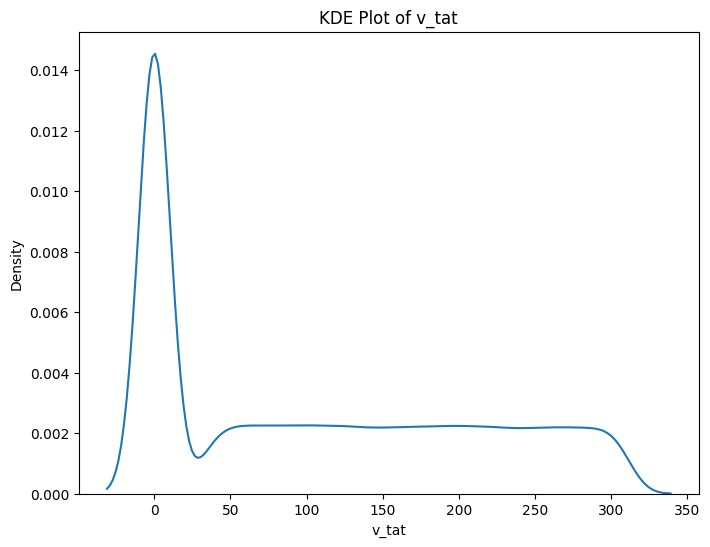

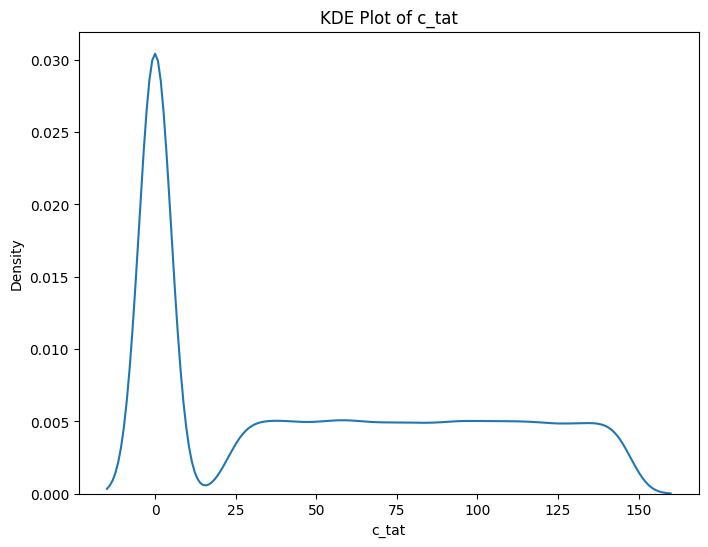

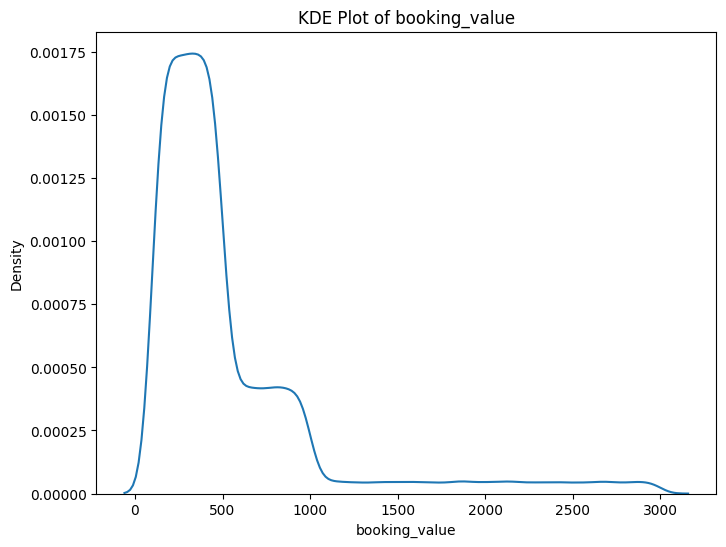

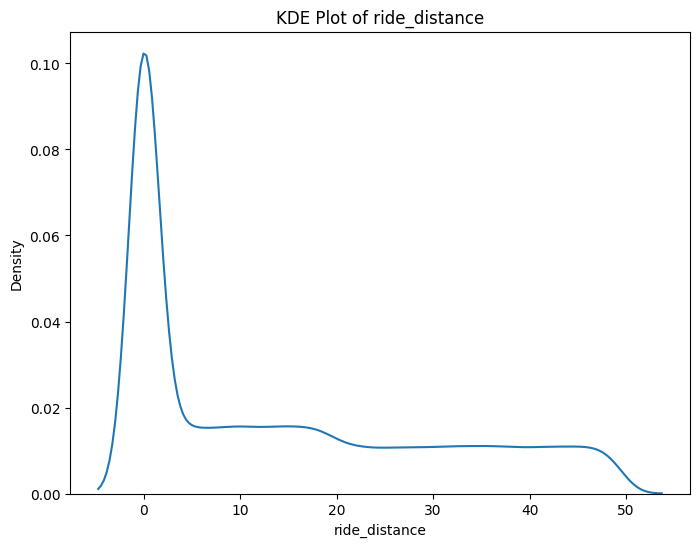

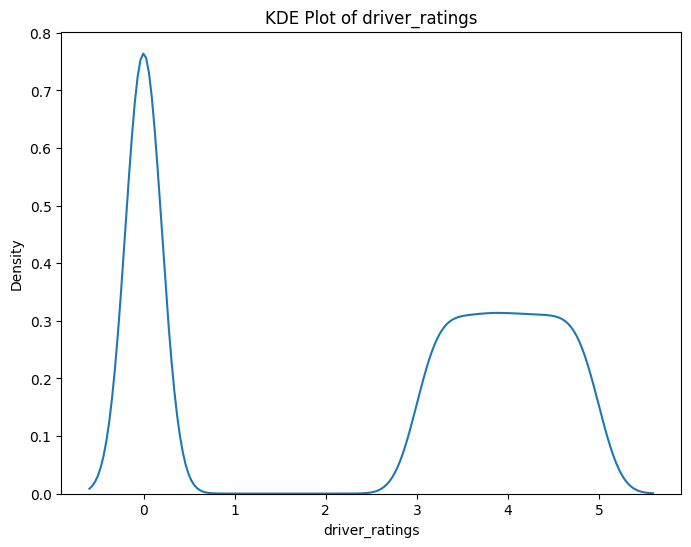

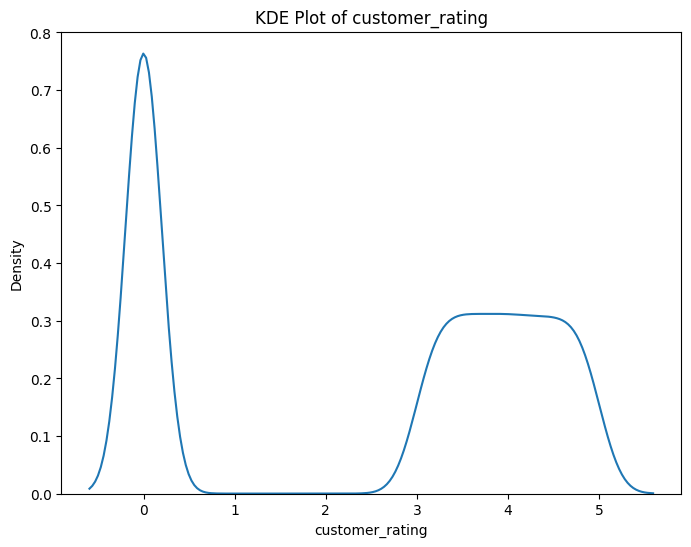

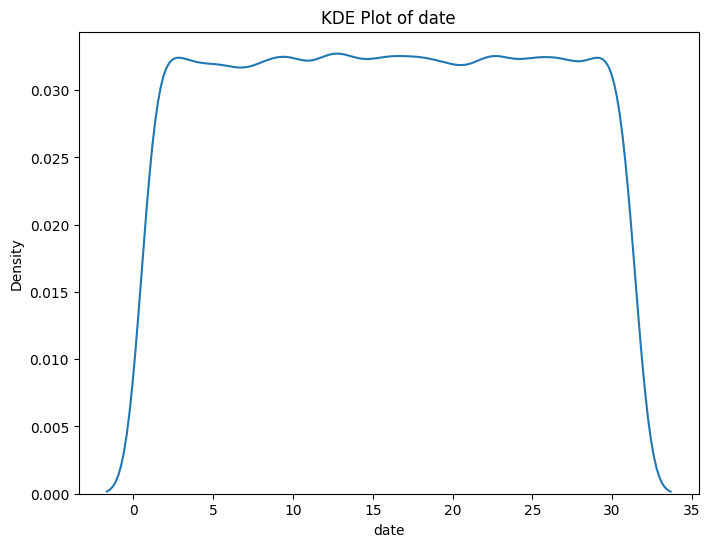

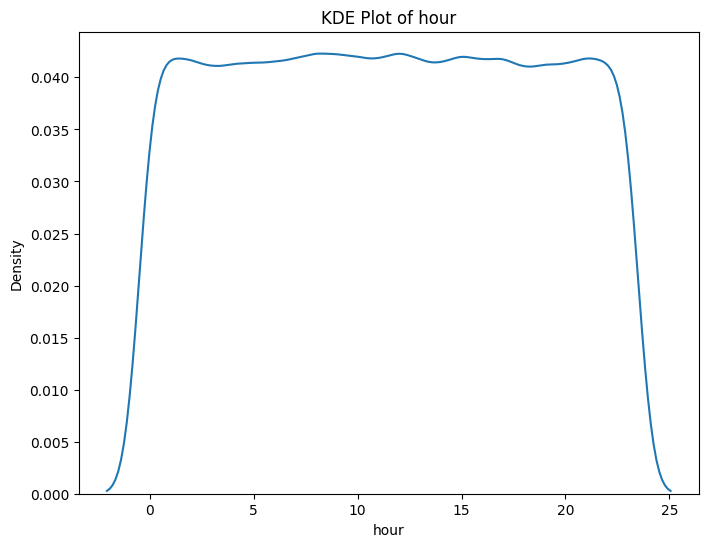

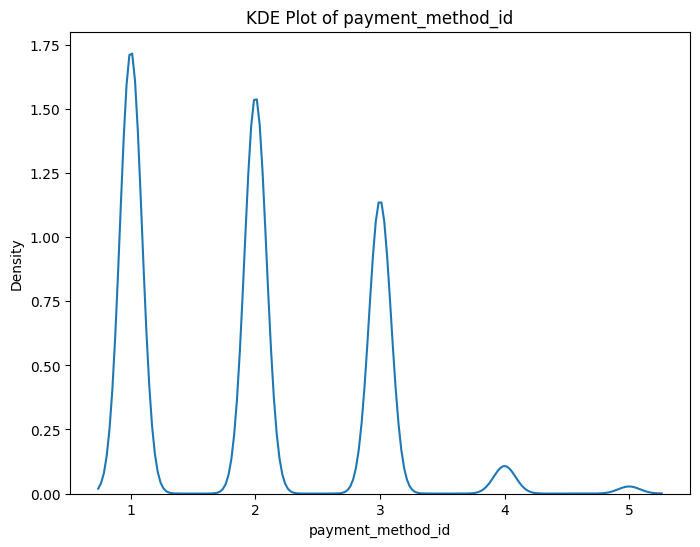

In [167]:
numerical_cols = ola.select_dtypes(include=np.number).columns

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.kdeplot(ola[col].dropna())
    plt.title(f'KDE Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.show()

In [168]:
ola.isnull().sum()

,0
booking_timestamp,0
booking_id,0
customer_id,0
v_tat,0
c_tat,0
canceled_rides_by_customer,0
canceled_rides_by_driver,0
incomplete_rides,0
incomplete_rides_reason,0
booking_value,0


In [169]:
# Sort the DataFrame by 'booking_value' in descending order and select the top rows
top_booking_values = ola.sort_values(by=['booking_value','ride_distance'], ascending=[False,True]).head(50)

# Display the selected rows with relevant columns
print("Rows with the highest booking values:")
display(top_booking_values[['booking_value', 'ride_distance', 'vehicle_type_id', 'status_id', 'pickup_location_id', 'drop_location_id']])

Rows with the highest booking values:


,booking_value,ride_distance,vehicle_type_id,status_id,pickup_location_id,drop_location_id
17665,2999,12,V-MI,S-S,L-CT,L-BL
64765,2999,29,V-PS,S-S,L-KG,L-CKP
83534,2999,45,V-PSUV,S-S,L-YSP,L-MJ
22090,2998,0,V-AU,S-CD,L-MGR,L-SJ
35242,2998,0,V-P+,S-CC,L-BL,L-LT
78696,2998,0,V-PSUV,S-DNF,L-KRP,L-BTM
94089,2998,7,V-EBK,S-S,L-HB,L-VT
36012,2998,12,V-EBK,S-S,L-VT,L-MH
4797,2998,27,V-PS,S-S,L-KRP,L-ST
80888,2998,41,V-EBK,S-S,L-MJ,L-CKP


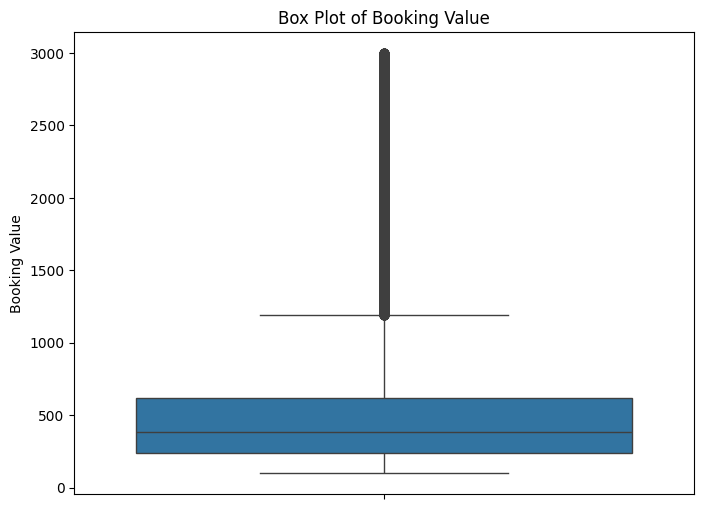

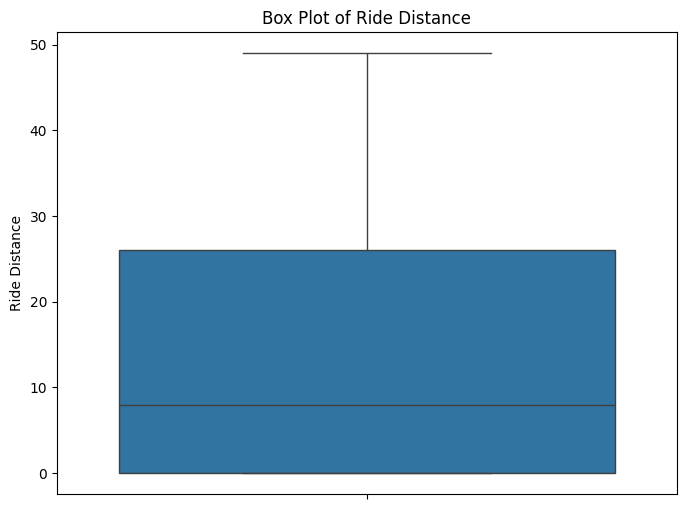

In [170]:
# Box plot for booking_value to visualize outliers
plt.figure(figsize=(8, 6))
sns.boxplot(y=ola['booking_value'])
plt.title('Box Plot of Booking Value')
plt.ylabel('Booking Value')
plt.show()

# Box plot for ride_distance to visualize outliers
plt.figure(figsize=(8, 6))
sns.boxplot(y=ola['ride_distance'])
plt.title('Box Plot of Ride Distance')
plt.ylabel('Ride Distance')
plt.show()

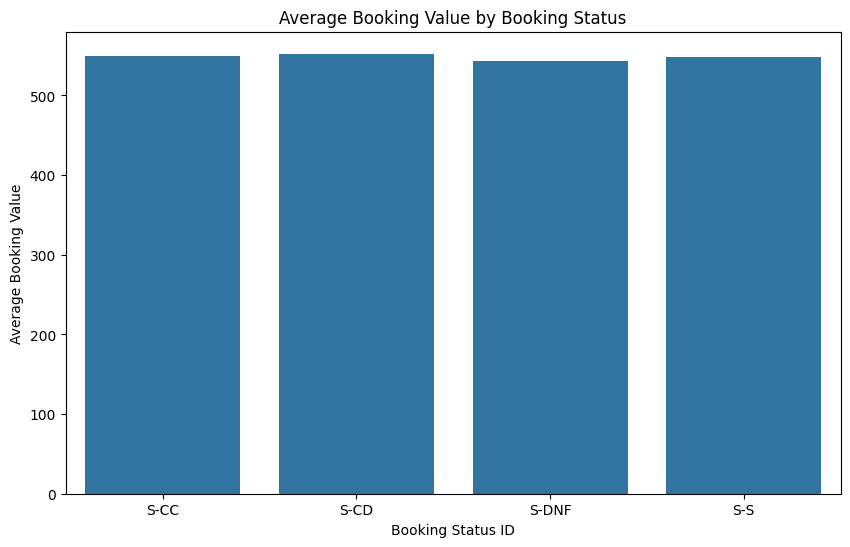

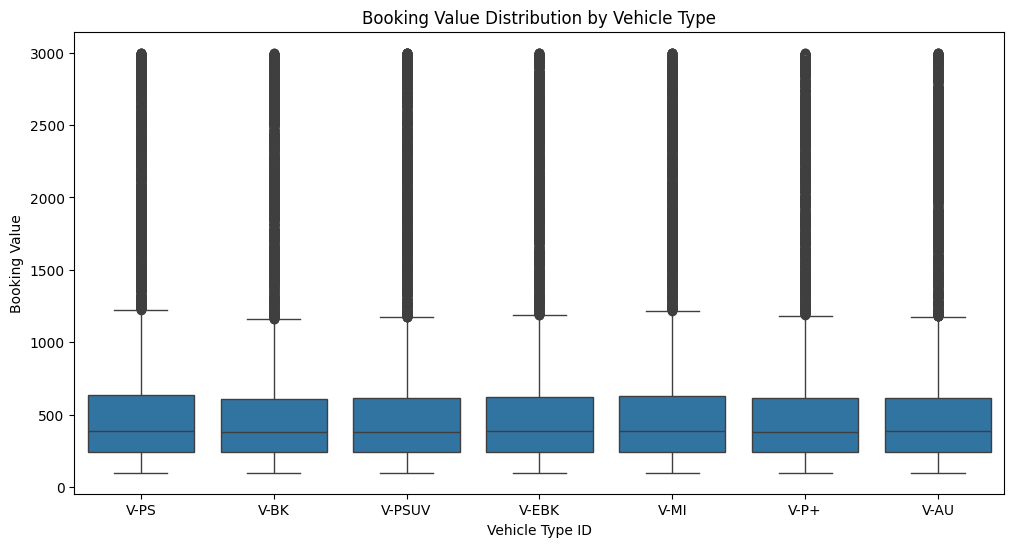

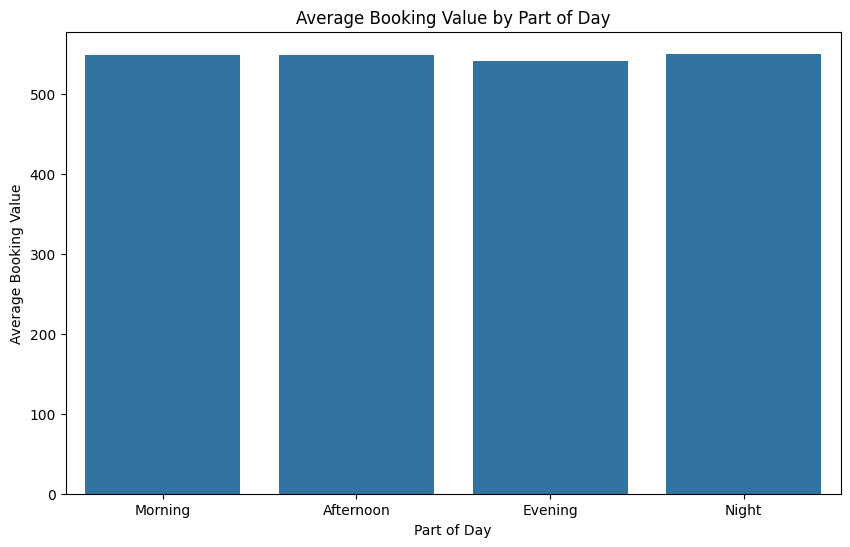

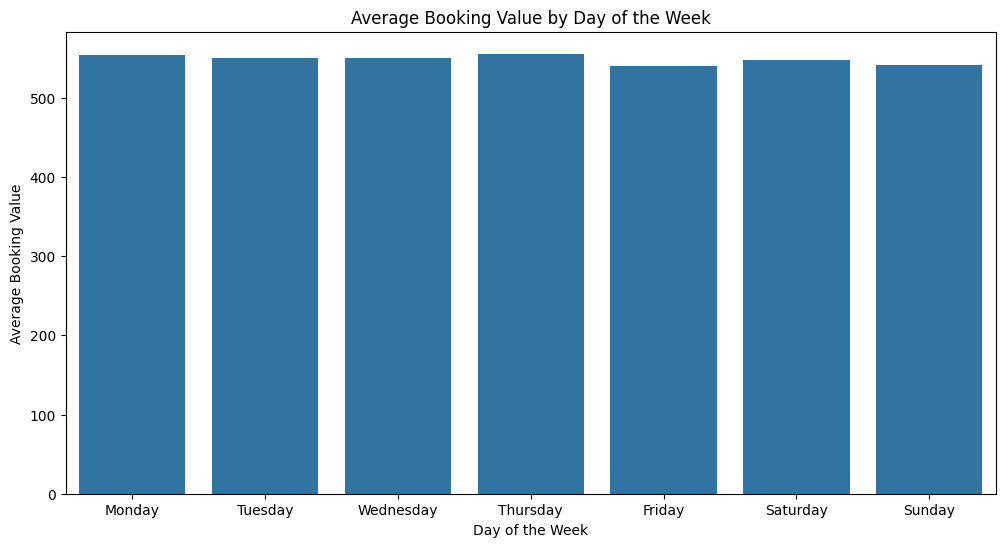

In [171]:
# 1. Bar plot for average booking_value by status_id
mean_booking_value_by_status = ola.groupby('status_id')['booking_value'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='status_id', y='booking_value', data=mean_booking_value_by_status)
plt.title('Average Booking Value by Booking Status')
plt.xlabel('Booking Status ID')
plt.ylabel('Average Booking Value')
plt.show()

# 2. Box plot for booking_value by vehicle_type_id
plt.figure(figsize=(12, 6))
sns.boxplot(x='vehicle_type_id', y='booking_value', data=ola)
plt.title('Booking Value Distribution by Vehicle Type')
plt.xlabel('Vehicle Type ID')
plt.ylabel('Booking Value')
plt.show()

# 3. Average booking value by part of day
mean_booking_value_by_part_of_day = ola.groupby('part_of_day')['booking_value'].mean().reindex(['Morning', 'Afternoon', 'Evening', 'Night']).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='part_of_day', y='booking_value', data=mean_booking_value_by_part_of_day)
plt.title('Average Booking Value by Part of Day')
plt.xlabel('Part of Day')
plt.ylabel('Average Booking Value')
plt.show()

# 4. Average booking value by day of the week
mean_booking_value_by_day_name = ola.groupby('day_name')['booking_value'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='day_name', y='booking_value', data=mean_booking_value_by_day_name)
plt.title('Average Booking Value by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Booking Value')
plt.show()

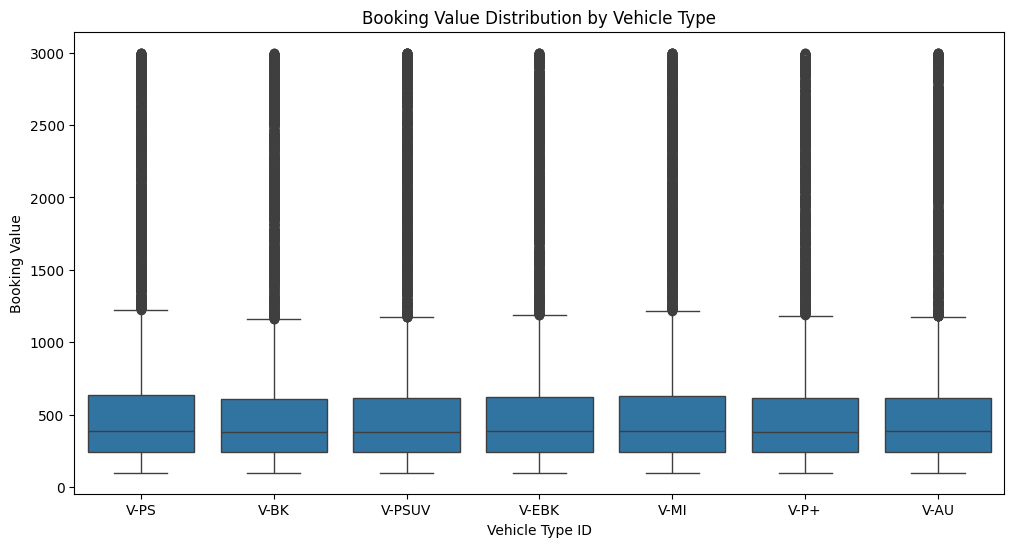

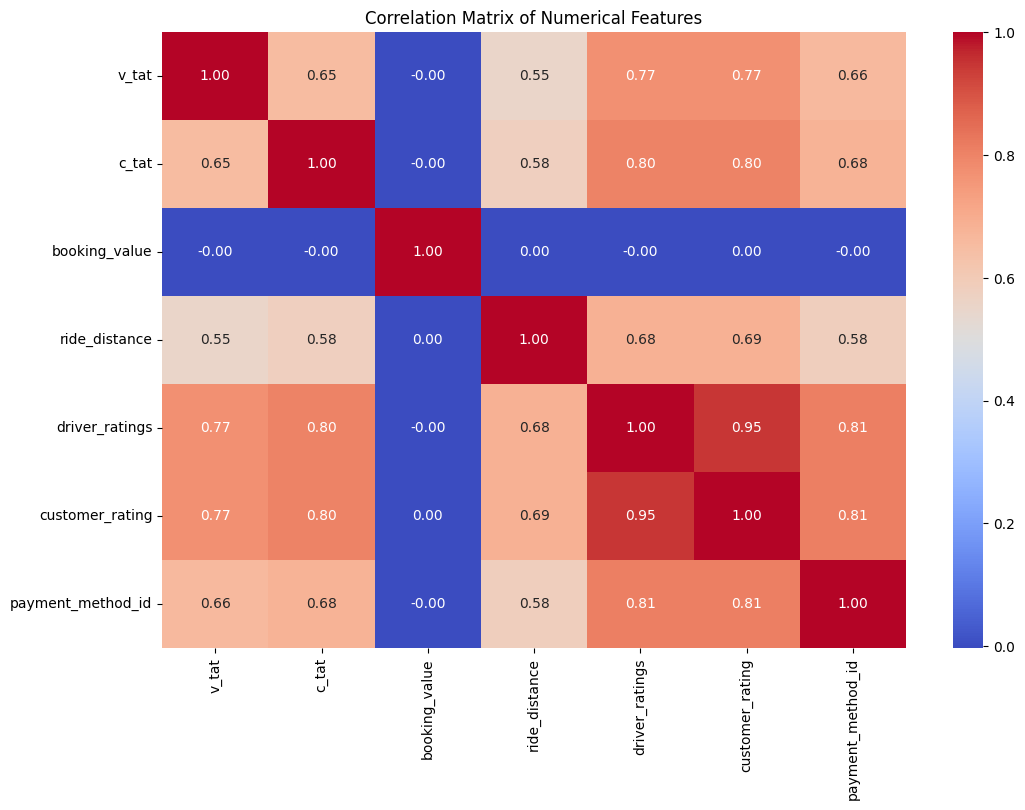

In [172]:
# 3. Box plot for booking_value by vehicle_type_id
plt.figure(figsize=(12, 6))
sns.boxplot(x='vehicle_type_id', y='booking_value', data=ola)
plt.title('Booking Value Distribution by Vehicle Type')
plt.xlabel('Vehicle Type ID')
plt.ylabel('Booking Value')
plt.show()

# 4. Heatmap of the correlation matrix for numerical columns (excluding date and hour)
numerical_cols_for_corr = ola.select_dtypes(include=np.number).columns.tolist()
cols_to_exclude = ['date', 'hour']
numerical_cols_for_corr = [col for col in numerical_cols_for_corr if col not in cols_to_exclude]
correlation_matrix = ola[numerical_cols_for_corr].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

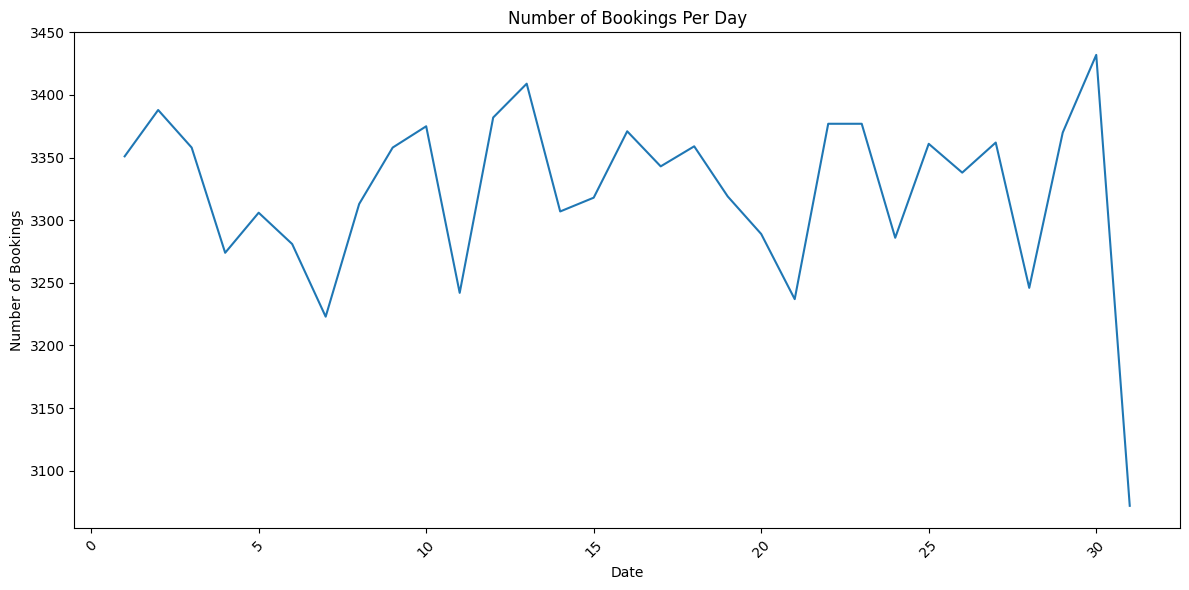

In [173]:
bookings_per_day = ola.groupby('date').size().reset_index(name='number_of_bookings')
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='number_of_bookings', data=bookings_per_day)
plt.title('Number of Bookings Per Day')
plt.xlabel('Date')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

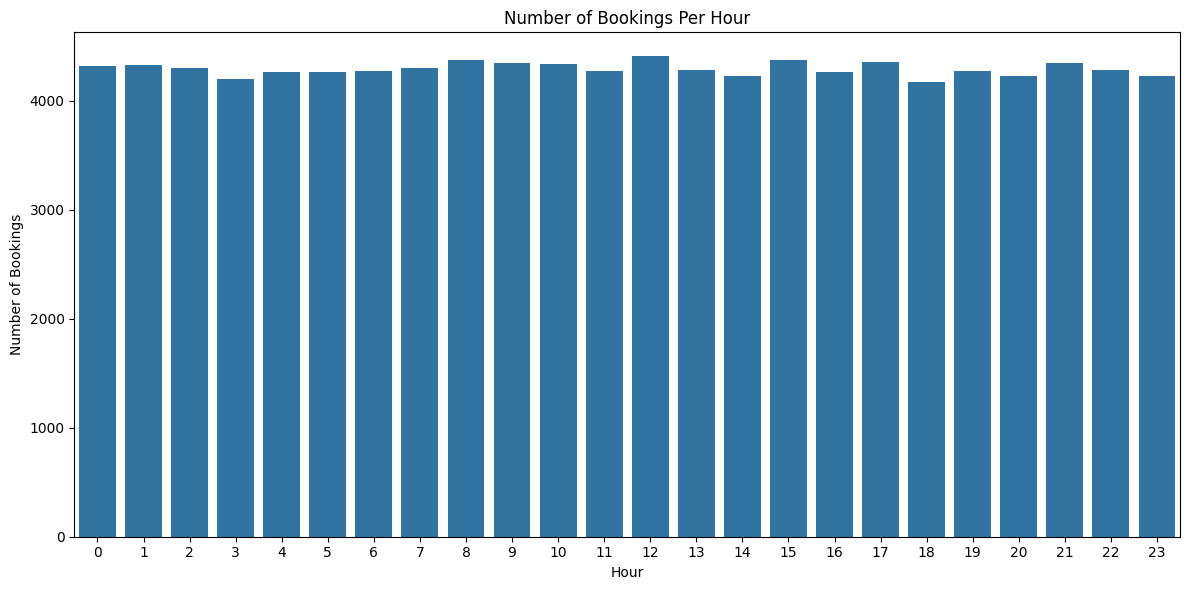

In [174]:
bookings_per_hour = ola.groupby('hour').size().reset_index(name='number_of_bookings')
plt.figure(figsize=(12, 6))
sns.barplot(x='hour', y='number_of_bookings', data=bookings_per_hour)
plt.title('Number of Bookings Per Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Bookings')
plt.tight_layout()
plt.show()

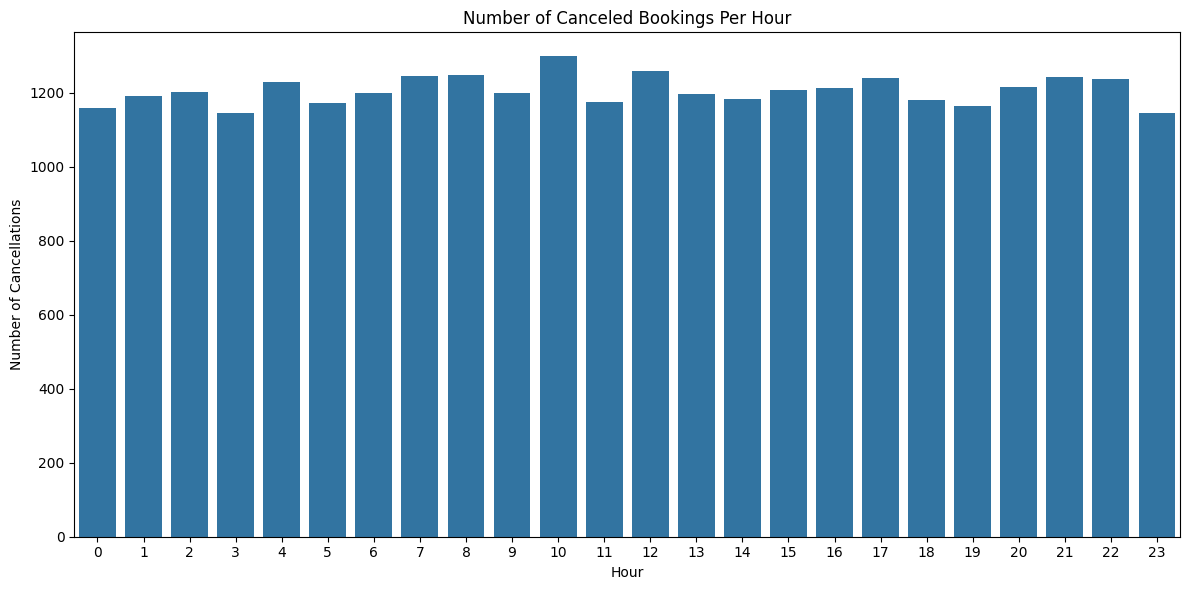

In [175]:
canceled_bookings = ola[ola['status_id'].isin(['S-CD', 'S-CC'])]
cancellations_per_hour = canceled_bookings.groupby('hour').size().reset_index(name='number_of_cancellations')
plt.figure(figsize=(12, 6))
sns.barplot(x='hour', y='number_of_cancellations', data=cancellations_per_hour)
plt.title('Number of Canceled Bookings Per Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Cancellations')
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   Several columns that initially had a significant number of missing values (`v_tat`, `c_tat`, `canceled_rides_by_customer`, `canceled_rides_by_driver`, `incomplete_rides`, `incomplete_rides_reason`, and `payment_method`) have been handled through imputation based on their relationships with other columns, particularly the `status_id`.
*   The columns `booking_id` and `customer_id` appear to be unique identifiers.
*   The distribution of `day_name` is relatively even across all days of the week.
*   The distribution of `vehicle_type_id` is fairly balanced among the different vehicle types.
*   The majority of rides in the dataset were successful, with a smaller percentage being canceled by the driver, canceled by the customer, or having a driver not found.
*   Average booking value varies significantly by `status_id`, which is expected as canceled or incomplete rides would likely have lower or no booking value.
*   There appears to be a positive correlation between `ride_distance` and `booking_value`, which is also expected.
*   Booking value distribution varies across different `vehicle_type_id` categories, as shown by the box plots.
*   The heatmap of numerical features indicates the correlation between different numerical columns (excluding date and hour).
*   There are fluctuations in the number of bookings per day.
*   Booking volume and cancellation rates vary throughout the hours of the day, suggesting peak times for both.
*   The top 10 busiest pickup and drop locations have been identified based on the number of bookings.

### Insights or Next Steps

*   The imputation strategy based on the relationship between missing values and booking status seems appropriate for this dataset.
*   Further analysis of the temporal patterns (bookings and cancellations per hour/day) could help identify specific times or days for targeted operational improvements or marketing strategies.
*   Investigating the busiest pickup and drop locations in more detail could help optimize driver allocation and identify potential areas for expansion.
*   Analyzing the reasons for cancellations and incomplete rides could provide insights into areas for service improvement.

In [ ]:
ola.to_csv('ola_cleaned_dataset.csv',index=False)